In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")



In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Customer-Churn.csv to Customer-Churn.csv


In [ ]:
df = pd.read_csv("Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Advertisement,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  Advertisement     7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
for feature in df.columns:
    if df[feature].dtype not in ['int64', 'float64']:   
        print(f"{feature}:{df[feature].unique()}")

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
Advertisement:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:['No' 'Yes']


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df = df.dropna()  
df = df.drop(['customerID'], axis = 1)  

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  Advertisement     7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [ ]:
from sklearn.preprocessing import LabelEncoder
for c in df.columns:
    if df[c].dtype=='object':    
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Advertisement,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  Advertisement     7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  


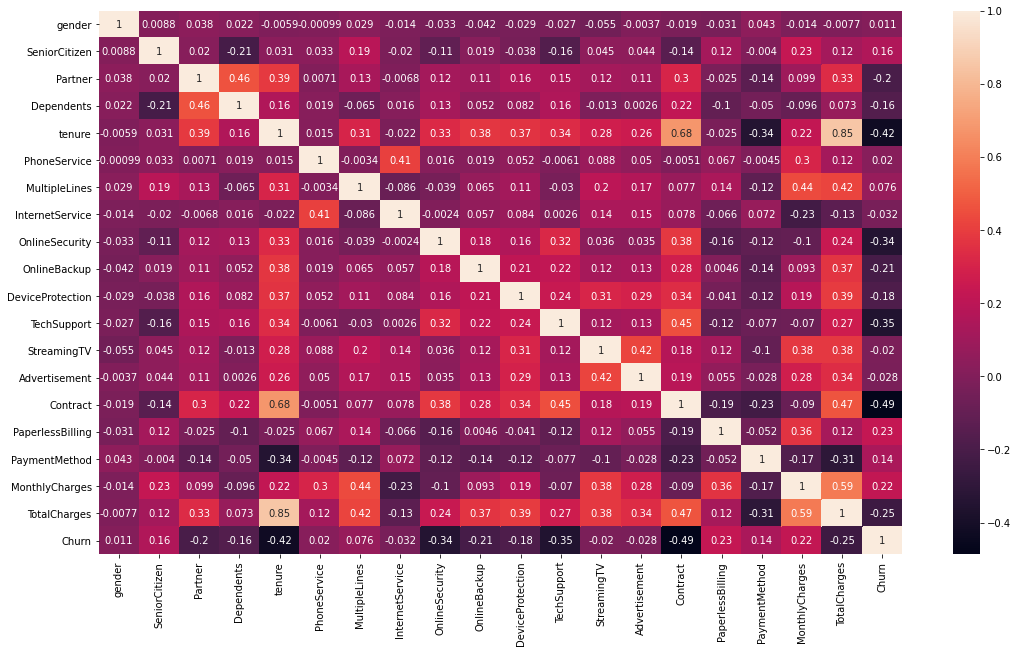

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (18,10))

sns.heatmap(df.corr(), annot =True)

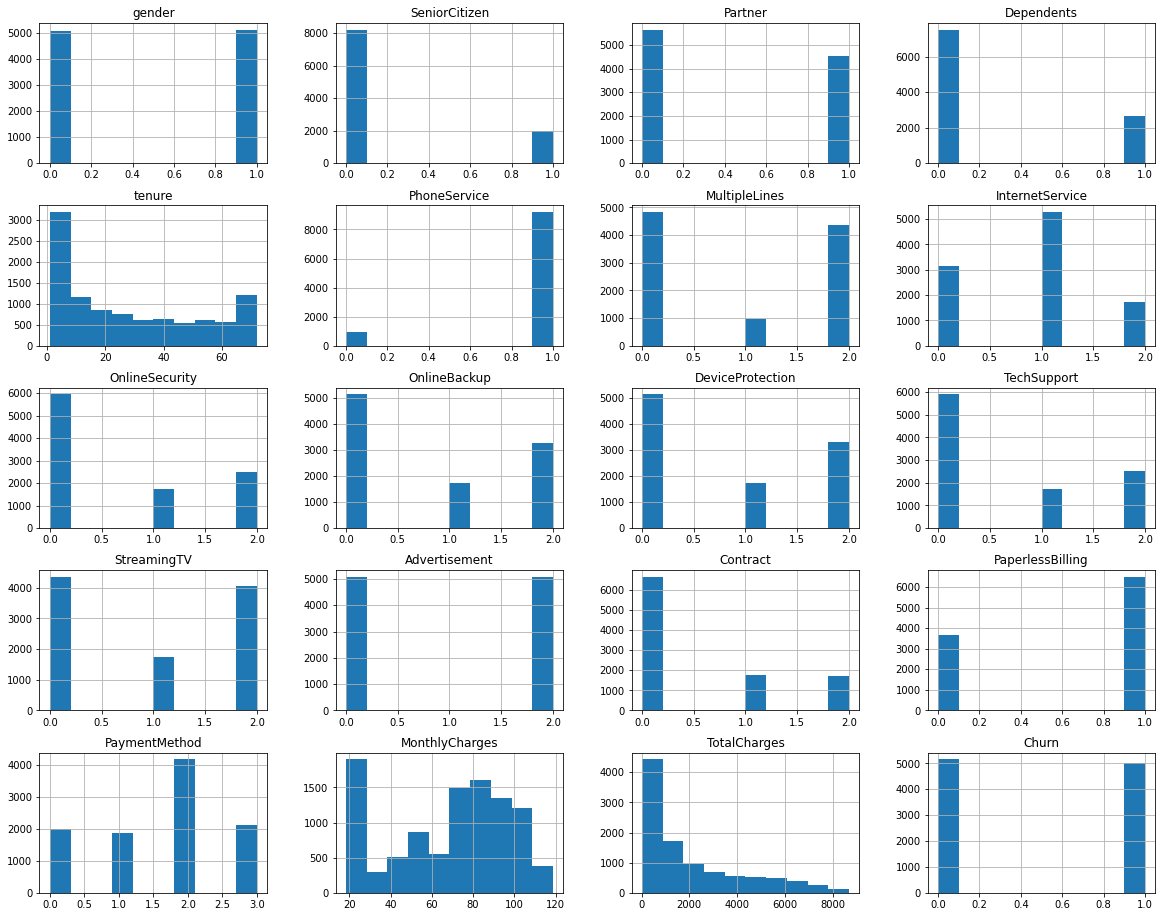

In [ ]:
df.hist(figsize=(20,16))
plt.show()

In [ ]:
zero  = df[df['Churn']==0]  
one = df[df['Churn']==1]  
from sklearn.utils import resample
df_minority_upsampled = resample(one, replace = True, n_samples = 5000) 

df = pd.concat([zero, df_minority_upsampled])

from sklearn.utils import shuffle
df = shuffle(df)

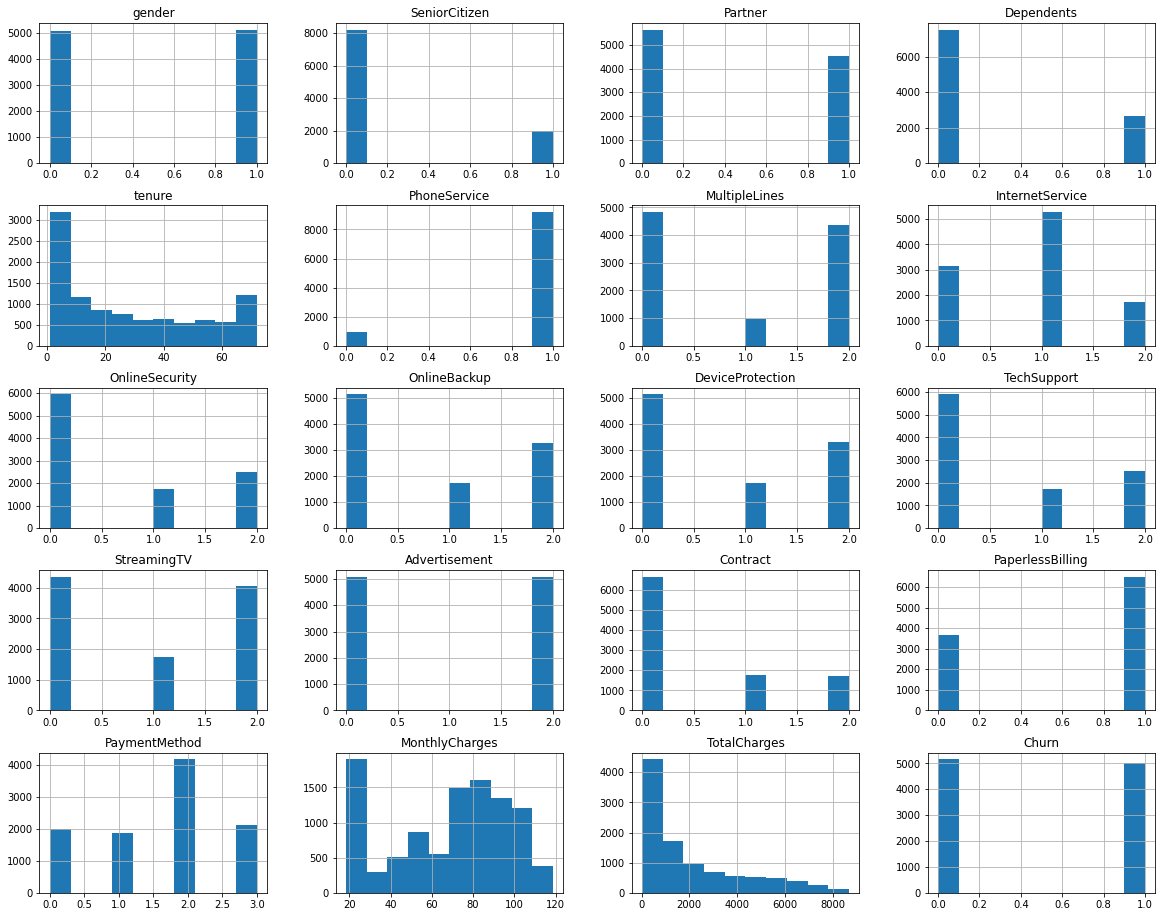

In [ ]:
df.hist(figsize=(20,16))
plt.show()

In [ ]:
df.corr().abs()['Churn'].sort_values(ascending = False)

Churn               1.000000
Contract            0.489554
tenure              0.418698
OnlineSecurity      0.335206
TechSupport         0.328117
TotalCharges        0.242730
MonthlyCharges      0.220583
OnlineBackup        0.218860
PaperlessBilling    0.216964
DeviceProtection    0.200468
Dependents          0.192060
Partner             0.169416
SeniorCitizen       0.165587
PaymentMethod       0.130949
Advertisement       0.058055
InternetService     0.048622
MultipleLines       0.037442
StreamingTV         0.035959
PhoneService        0.012227
gender              0.009662
Name: Churn, dtype: float64

In [ ]:
X = df[['Contract', 'tenure', 'TechSupport', 'OnlineSecurity', 'TotalCharges', 'PaperlessBilling',
       'DeviceProtection', 'Dependents', 'OnlineBackup', 'SeniorCitizen', 'MonthlyCharges',
       'PaymentMethod', 'Partner', 'PhoneService']] 
y = df['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier
xgb =XGBClassifier(eval_metric = 'auc', use_label_encoder=False, objective = 'binary:logistic')


params_xgb = {'n_estimators': [100,400,800], 'learning_rate': [0.3,0.5,1],
             'max_depth': [6,8,15]}
gs_xgb =  GridSearchCV(xgb, param_grid=params_xgb, cv=5)
gs_xgb.fit(X_train, y_train)
print("Best parameters for XGBoost:", gs_xgb.best_params_)

Best parameters for XGBoost: {'learning_rate': 1, 'max_depth': 15, 'n_estimators': 800}


In [ ]:
xgb = XGBClassifier(learning_rate = 0.3, max_depth = 25, n_estimators = 400,
                    eval_metric = 'auc',
                    use_label_encoder=False, 
                    objective = 'binary:logistic', random_state = 42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, learning_rate=0.3, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, use_label_encoder=False, verbosity=1)

In [ ]:
y_pred = xgb.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       982
           1       0.86      0.94      0.90      1051

    accuracy                           0.89      2033
   macro avg       0.90      0.89      0.89      2033
weighted avg       0.90      0.89      0.89      2033

